<a href="https://colab.research.google.com/github/lisosoma/BI-statistics/blob/main/bi_hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import scipy.integrate as integ
import math 

In [ ]:
df = pd.read_table('IB_statistics_data_HW7.txt',sep='\s+', engine='python')

In [ ]:
n = len(df['Ex1'])

##### Задание 1.

Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05


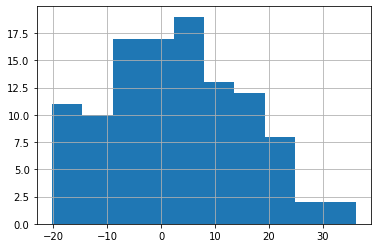

In [ ]:
mu_1 = 3.14
mean_1 = sum(df['Ex1']) / n
var_1 = 0
for x in df['Ex1']:
    var_1 += (x - mean_1) ** 2
var_1 /= (n - 1)

T_1 = (mu_1 - mean_1) * math.sqrt(n) / math.sqrt(var_1)

k1 = sts.t.ppf(q = 0.025, df = n - 1, loc=0, scale=1)
k2 = sts.t.ppf(q = 0.975, df = n - 1, loc=0, scale=1)

if T_1 > k1 and T_1 < k2:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
    
h_1 = df['Ex1'].hist()
fig = h_1.get_figure()

##### Задание 2.

Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05


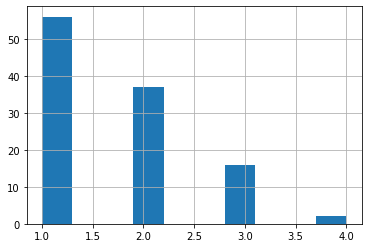

In [ ]:
pi = math.pi
T_2n = 0

p = [ n * 6 / pi ** 2, n * 3 / 2 / pi ** 2, n * 25 / 24 / pi ** 2, n * (1 - 205 / 24 / pi ** 2)]
v = [0, 0, 0, 0]

for i in range(n):
    if df['Ex2'][i] == 1:
        v[0] += 1
    elif df['Ex2'][i] == 2:
        v[1] += 1
    elif df['Ex2'][i] == 3 or df['Ex2'][i] == 4:
        v[2] += 1
    else:
        v[3] += 1

for i in range(4):
    T_2n += (v[i] - p[i]) ** 2 / (p[i])
    
if T_2n >= sts.chi.ppf(q = 1 - 0.05, df = 3):
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
    
h_2 = df['Ex2'].hist()
fig = h_2.get_figure()

##### Задание 3.

Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05
4.228526715850659 3.9379325865059513


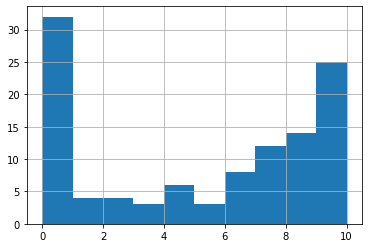

In [ ]:
T_3n = 0

v = [0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(n):
    if df['Ex3'][i] <= 2:
        v[0] += 1
    elif df['Ex3'][i] == 3:
        v[1] += 1
    elif df['Ex3'][i] == 4:
        v[2] += 1
    elif df['Ex3'][i] == 5:
        v[3] += 1
    elif df['Ex3'][i] == 6:
        v[4] += 1
    elif df['Ex3'][i] == 7:
        v[5] += 1
    elif df['Ex3'][i] == 8:
        v[6] += 1
    elif df['Ex3'][i] == 9:
        v[7] += 1
    elif df['Ex3'][i] == 10:
        v[8] += 1

teta = (sum(v) - v[0]) / 52 / sum(v)

p = [n * i * teta for i in range(2, 11)]
p[0] = n * (1 - 52 * teta)
        
for i in range(9):
    T_3n += (v[i] - p[i]) ** 2 / (p[i])
    
if T_3n >= sts.chi.ppf(q = 0.95, df = 8):
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
    
h_3 = df['Ex3'].hist()
fig = h_3.get_figure()

print(T_3n, sts.chi.ppf(q = 1 - 0.05, df = 8))

##### Задание 4.

Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05


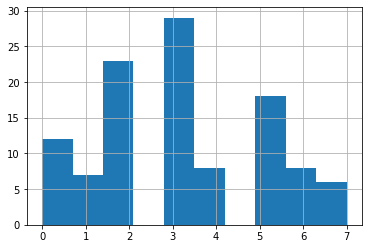

In [ ]:
T_4n = 0

p = [1 / 11 for i in range(11)]
v = [0 for i in range(11)]

for i in range(n):
    v[df['Ex4'][i] - 1] += 1

for i in range(4):
    T_4n += (v[i] - p[i]) ** 2 / (p[i])
    
if T_4n >= sts.chi.ppf(q = 1 - 0.05, df = 10):
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
    
h_4 = df['Ex4'].hist()
fig = h_4.get_figure()

##### Задание 5.

In [ ]:
teta = max(df['Ex5'])
a_5 = df.sort_index().sort_values('Ex5', kind='mergesort')
res_5 = list(a_5['Ex5'])

print(teta)

0.5725476444042271


Так как максимум из выборки -- максимальная площадь треугольника, равная половине площади квадрата, то, как видно, она больше 0.5, поэтому тета не может быть меньше 1.

In [ ]:
def f1(c):
    f_1 = lambda x : (c / teta + x - (c / teta + x) * math.log(c / teta + x)) * (-math.log(x))
    return f_1

def f2(c):
    f_2 = lambda x : (x - c / teta - (x - c / teta) * math.log(x - c / teta)) * (-math.log(x))
    return f_2

F_t_5 = [integ.quad(f1(res_5[i]), 0, 1) +  integ.quad(f2(res_5[i]), 0, 1) 
        for i in range(n)]                #теореттическая функция распределения
F_e_5 = [0 for i in range(n)]              #эмпирическая функция распределения

for i in range(n):
    j = 0
    while((res_5[j] <= res_5[i]) and j < n - 1):
        F_e_5[i] += 1
        j += 1
    F_e_5[i] /= n
    
D_n_5 = [abs(F_e_5[i] - F_t_5[i]) for i in range(len(res_5))]
T_n_5 = math.sqrt(n) * max(D_n_5)            #статистика критерия Колмогорова

lambda_5 = 1.36      #квантиль распределения Колмогорова для уровня значимости alpha = 0.05 взят из таблицы

if T_n_5 < lambda_5:
    print('Есть основания отклонить H_0 в пользу H_1 с уровнем значимости 0.05')
else:
    print('Нет оснований отклонить H_0 в пользу H_1 с уровнем значимости 0.05')

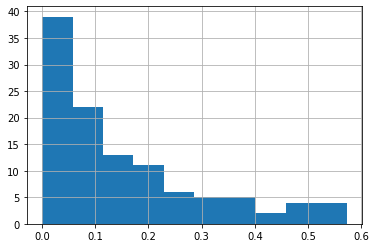

In [ ]:
h_5 = df['Ex5'].hist()
fig = h_5.get_figure()